# Background 

We used NBA motion data from SportsVU sensors and plotted player movements for each play. We created a random forest model that analyzed player movements and tried to determine who shot the ball. Our model was accurate 48% of the time. Although 48% may not seem high, it is more accuate than if a human tried to make this prediction, who would be correct 20% of the time on average (1/5 players on the court). To prove this point, we created a game where an indivual plays against our model. We show you a plot and you tell us who you think shot the ball - and our model does the same.

The team we are looking at is the San Antonio Spurs during the 2014-2015 regular season. This notebook will show you how to build the game itself and then lets you play it. 


# Create the dataframes

Our initial dataframe consists of a pickle file which includes the x,y coordinates for each Spurs player and for each play. Also included in this dataset is the player who actually took the shot. Our initial goal is to append to this dataset the predictions made by our model. In the NBA-tracking repo, run the model using python code found here: nba-tracking/VisualGame/CreatingBaseDF.py. After you run this code, you will have a csv which appends the predicted names from our model (column "Predicted") with the original pickle file, as shown below. 

In [32]:
#imports we will be needing
import os
import csv
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
import seaborn as sns

#for visuals
sns.set_color_codes()
sns.set_style("white")

#Setting default directory
os.chdir('/Users/khalilezzine/Desktop/DS/nba-tracking/')
filename = os.path.join(os.getcwd(), 'Visual_Game','df_w_predicted.csv')

# make sure to include the correct file path
dfbis = pd.read_csv(filename) 



We now create a new dataframe from the pickle which only includes the x,y coordinates for the following players: Danny Green, Kawhi Leonard, LaMarcus Aldridge, Tim Duncan and Tony Parker. 

In [33]:
filename = os.path.join(os.getcwd(), 'data','pickle.pickle')
ddfbis=pd.read_pickle(filename)
dfbis2 = ddfbis.iloc[:,35:]#selecting only columns with x,y coordinated

# drop column if it does not contain one the these 5 players
for item in dfbis2.columns: 
    if item[2]=="Danny Green":
        pass
    elif item[2]=="Kawhi Leonard":
        pass
    elif item[2]=="LaMarcus Aldridge":
        pass
    elif item[2]=="Tim Duncan":
        pass
    elif item[2]=="Tony Parker":
        pass
    else:
        dfbis2.drop(item, axis=1, inplace=True)

We generate another dataframe which only include the information we need, i.e. Predicted, PLAYER1_NAME, and the x,y coordinates for 5 players we mentioned above. 

In [34]:
dfbis1 = dfbis[['Predicted', 'PLAYER1_NAME']] #selecting only these 2 columns

#final_dbis has Predicted, Predicted1_NAME and xy Coordinates for only those 5 players
final_dbis = pd.concat([dfbis1,dfbis2],axis=1) #includes the dataframe above with x,y values

# print (final_dbis.head(3))

We can now drop the plays where these 5 players are on the bench using dropna. 

In [35]:
final_dbis.dropna(how='any',inplace=True)

#  print (final_dbis.tail)

In [36]:
filename_p1 = os.path.join(os.getcwd(), 'Visual_Game','df4plot1.csv')
final_dbis.to_csv(filename_p1)#see it in a csv

#  print (final_dbis.shape) # shape of our dataframe

In [37]:
#dfvisual = final_dbis 
dfvisual = pd.read_csv(filename_p1)# pandas df
rnd = random.randint(0,len(dfvisual.index)-1)#random generator

For each player, a dataframe which includes their x,y coordinates in two columns.

In [38]:
'''We will do this for Danny Green first'''
DGlstx = [] # create an empty list where we store the columns for x values for each player
DGlsty = [] # create an empty list where we store the columns for y values for each player
DGlstname = [] # create an empty list where we store the player's name

# we store the number of the columns for x values in our dataframe into the list DGlstx
i=3 # this number, 3, will change depending on the player
count = 0
while count < 30:
    DGlstx.append(i)
    i += 5 # we find the next value after 4 other players, hence the +5 increment
    count += 1

# we store the number of the columns for x values in our dataframe into the list DGlsty
i = 153 # this number will change depending on the player
count = 0
while count < 30:
    DGlsty.append(i)
    i += 5 # we find the next value after 4 other players, hence the +5 increment
    count += 1

# add name of player to each item of the list DGlstname
count = 0
while count < 30:
    DGlstname.append("Danny Green")
    count += 1

DGlstxv = []  # create an empty df where we store the x values
DGlstyv = [] # create an empty df where we store the y values

# we select the x coordinate entires using iloc
for i in DGlstx:
    DGlstxv.append(dfvisual.iloc[rnd,i]) #rnd is the row/index number, i is the column number
    
# we select the y coordinate entires using iloc
for i in DGlsty:
    DGlstyv.append(dfvisual.iloc[rnd,i]) #rnd is the row/index number, i is the column number

dfDG = pd.DataFrame([DGlstname, DGlstxv, DGlstyv]).T # we transpose our dataframe

Below is what the dataframe for a single player, Danny green looks like. Column 1 is x values and column 2 is y values

In [39]:
#  print (dfDG)

We repeat this process for the rest of the players

In [40]:
'''Tim Duncan'''
TDlstx = []
TDlsty = []
TDlstname = []

i=6
count = 0
while count < 30:
    TDlstx.append(i)
    i += 5
    count += 1

i = 156
count = 0
while count < 30:
    TDlsty.append(i)
    i += 5
    count += 1

count = 0
while count < 30:
    TDlstname.append("Tim Duncan")
    count += 1

TDlstxv = []
TDlstyv = []

for i in TDlstx:
    TDlstxv.append(dfvisual.iloc[rnd,i])

for i in TDlsty:
    TDlstyv.append(dfvisual.iloc[rnd,i])

dfTD = pd.DataFrame([TDlstname, TDlstxv, TDlstyv]).T

'''Kawhi Leonard'''
KLlstx = []
KLlsty = []
KLlstname = []

i=4
count = 0
while count < 30:
    KLlstx.append(i)
    i += 5
    count += 1

i = 154
count = 0
while count < 30:
    KLlsty.append(i)
    i += 5
    count += 1

count = 0
while count < 30:
    KLlstname.append("Kawhi Leonard")
    count += 1

KLlstxv = []
KLlstyv = []

for i in KLlstx:
    KLlstxv.append(dfvisual.iloc[rnd,i])

for i in KLlsty:
    KLlstyv.append(dfvisual.iloc[rnd,i])

dfKL = pd.DataFrame([KLlstname, KLlstxv, KLlstyv]).T

'''LaMarcus Aldridge'''
LAlstx = []
LAlsty = []
LAlstname = []

i=5
count = 0
while count < 30:
    LAlstx.append(i)
    i += 5
    count += 1

i = 155
count = 0
while count < 30:
    LAlsty.append(i)
    i += 5
    count += 1

count = 0
while count < 30:
    LAlstname.append("LaMarcus Aldridge")
    count += 1

LAlstxv = []
LAlstyv = []

for i in LAlstx:
    LAlstxv.append(dfvisual.iloc[rnd,i])

for i in LAlsty:
    LAlstyv.append(dfvisual.iloc[rnd,i])

dfLA = pd.DataFrame([LAlstname, LAlstxv, LAlstyv]).T

'''Tony Parker'''
TPlstx = []
TPlsty = []
TPlstname = []

i=7
count = 0
while count < 30:
    TPlstx.append(i)
    i += 5
    count += 1

i = 157
count = 0
while count < 30:
    TPlsty.append(i)
    i += 5
    count += 1

count = 0
while count < 30:
    TPlstname.append("Tony Parker")
    count += 1

TPlstxv = []
TPlstyv = []

for i in TPlstx:
    TPlstxv.append(dfvisual.iloc[rnd,i])

for i in TPlsty:
    TPlstyv.append(dfvisual.iloc[rnd,i])

dfTP = pd.DataFrame([TPlstname, TPlstxv, TPlstyv]).T

We now append, or concatenate, the dataframes for each of the player into a single df called df_plt, save to a csv called df4plot2.csv, and print the result. Now we have all the coordinates we need to create the plots.  

In [41]:
"""Creating DataFrame for visual"""
df_plt = pd.concat([dfDG, dfTD, dfKL,dfLA,dfTP], axis=1)
filename_p2 = os.path.join(os.getcwd(), 'Visual_Game','df4plot2.csv')
df_plt.to_csv(filename_p2)

# print (df_plt)

# Create the plots

We now create the plots, using a different color for each player. Because we are using the random generator, everytime we run the cell below, we generate a different plot which corresponds to a different play. 

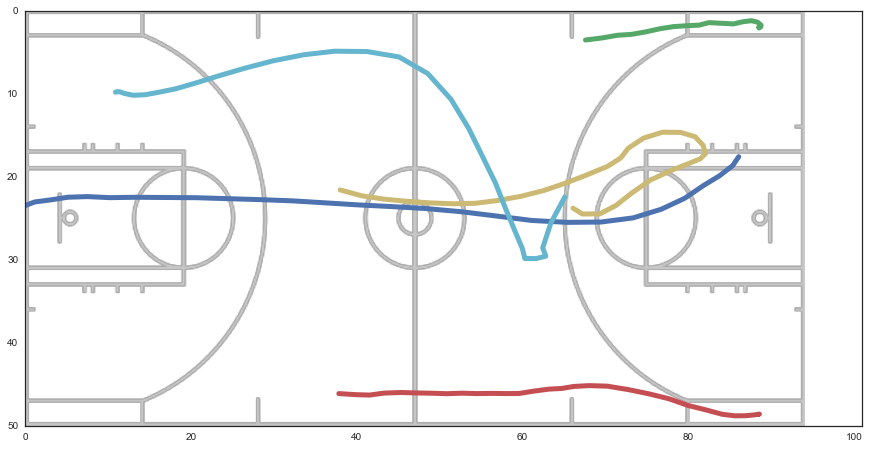

In [42]:
"""Creating Plot"""

#displays plot inline instead of in separate window
%matplotlib inline 

#loads values from the df for each player

imagesource = os.path.join(os.getcwd(), 'Visual_Game','fullcourt.png')

DGx,DGy, TDx, TDy, KLx, KLy, LAx, LAy,TPx,TPy=np.loadtxt(filename_p2,unpack=True,
                delimiter=',',skiprows=1,usecols=(2,3,5,6,8,9,11,12,14,15)) # taking x,y values
court=plt.imread(imagesource) #.png of the court
plt.figure(figsize=(15,11.5))

plt.imshow(court, zorder=0, extent=[0,94,50,0])# dimensions of nba court, 1 unit = 1 foot
plt.xlim(0,101)

plt.plot(DGx,DGy, color='r', linewidth=5.0) # Danny Green in red
plt.plot(TDx,TDy, color='b', linewidth=5.0) # Tim Duncan in blue
plt.plot(KLx,KLy, color='g', linewidth=5.0) # Kawhi Leonard in green
plt.plot(LAx,LAy, color='y', linewidth=5.0) # LaMarcus Aldridge in yellow
plt.plot(TPx,TPy, color='c', linewidth=5.0) # Tony Parker in cyan

plt.show()

To continue generating different plots, keep running the code in the cell below (make sure to enter the correct file paths). 

In [43]:
dfvisual = pd.read_csv(filename_p1)
imagesource = os.path.join(os.getcwd(), 'Visual_Game','fullcourt.png')

#Plot Generator samples one random play of the 600+ that contains the 5 spurs starters.


def PlotGen(rnd):

    '''We will do this for Danny Green first'''
    DGlstx = []
    DGlsty = [] 
    DGlstname = [] 
    i=3 
    count = 0
    while count < 30:
        DGlstx.append(i)
        i += 5 
        count += 1
    i = 153 
    count = 0
    while count < 30:
        DGlsty.append(i)
        i += 5 
        count += 1
    count = 0
    while count < 30:
        DGlstname.append("Danny Green")
        count += 1
    DGlstxv = []  
    DGlstyv = [] 
    for i in DGlstx:
        DGlstxv.append(dfvisual.iloc[rnd,i]) 
    for i in DGlsty:
        DGlstyv.append(dfvisual.iloc[rnd,i]) 
    dfDG = pd.DataFrame([DGlstname, DGlstxv, DGlstyv]).T 
    TDlstx = []
    TDlsty = []
    TDlstname = []
    i=6
    count = 0
    while count < 30:
        TDlstx.append(i)
        i += 5
        count += 1
    i = 156
    count = 0
    while count < 30:
        TDlsty.append(i)
        i += 5
        count += 1
    count = 0
    while count < 30:
        TDlstname.append("Tim Duncan")
        count += 1
    TDlstxv = []
    TDlstyv = []
    for i in TDlstx:
        TDlstxv.append(dfvisual.iloc[rnd,i])
    for i in TDlsty:
        TDlstyv.append(dfvisual.iloc[rnd,i])
    dfTD = pd.DataFrame([TDlstname, TDlstxv, TDlstyv]).T
    KLlstx = []
    KLlsty = []
    KLlstname = []
    i=4
    count = 0
    while count < 30:
        KLlstx.append(i)
        i += 5
        count += 1
    i = 154
    count = 0
    while count < 30:
        KLlsty.append(i)
        i += 5
        count += 1
    count = 0
    while count < 30:
        KLlstname.append("Kawhi Leonard")
        count += 1
    KLlstxv = []
    KLlstyv = []
    for i in KLlstx:
        KLlstxv.append(dfvisual.iloc[rnd,i])
    for i in KLlsty:
        KLlstyv.append(dfvisual.iloc[rnd,i])
    dfKL = pd.DataFrame([KLlstname, KLlstxv, KLlstyv]).T
    LAlstx = []
    LAlsty = []
    LAlstname = []
    i=5
    count = 0
    while count < 30:
        LAlstx.append(i)
        i += 5
        count += 1
    i = 155
    count = 0
    while count < 30:
        LAlsty.append(i)
        i += 5
        count += 1
    count = 0
    while count < 30:
        LAlstname.append("LaMarcus Aldridge")
        count += 1
    LAlstxv = []
    LAlstyv = []
    for i in LAlstx:
        LAlstxv.append(dfvisual.iloc[rnd,i])
    for i in LAlsty:
        LAlstyv.append(dfvisual.iloc[rnd,i])
    dfLA = pd.DataFrame([LAlstname, LAlstxv, LAlstyv]).T
    TPlstx = []
    TPlsty = []
    TPlstname = []
    i=7
    count = 0
    while count < 30:
        TPlstx.append(i)
        i += 5
        count += 1
    i = 157
    count = 0
    while count < 30:
        TPlsty.append(i)
        i += 5
        count += 1
    count = 0
    while count < 30:
        TPlstname.append("Tony Parker")
        count += 1
    TPlstxv = []
    TPlstyv = []
    for i in TPlstx:
        TPlstxv.append(dfvisual.iloc[rnd,i])
    for i in TPlsty:
        TPlstyv.append(dfvisual.iloc[rnd,i])
    dfTP = pd.DataFrame([TPlstname, TPlstxv, TPlstyv]).T
    df_plt = pd.concat([dfDG, dfTD, dfKL,dfLA,dfTP], axis=1)
    df_plt.to_csv(filename_p2)
    %matplotlib inline 
    DGx,DGy, TDx, TDy, KLx, KLy, LAx, LAy,TPx,TPy=np.loadtxt(filename_p2,unpack=True,                delimiter=',',skiprows=1,usecols=(2,3,5,6,8,9,11,12,14,15)) # taking x,y values
    court=plt.imread(imagesource) 
    plt.figure(figsize=(15,11.5))
    plt.imshow(court, zorder=0, extent=[0,94,50,0])
    plt.xlim(0,101)
    DG = plt.plot(DGx,DGy, color='g', linewidth=5.0, label = 'Green')
    TD = plt.plot(TDx,TDy, color='b', linewidth=5.0, label = 'Duncan') 
    KL = plt.plot(KLx,KLy, color='r', linewidth=5.0, label = 'Leonard')
    LA = plt.plot(LAx,LAy, color='y', linewidth=5.0, label = 'Aldridge')
    TP = plt.plot(TPx,TPy, color='c', linewidth=5.0, label = 'Parker') 
    
    plt.legend()

    plt.show()


In [44]:
import ipywidgets as widgets
from IPython.display import display

def test(x):
    return x

wedgie = widgets.Select(
    options=['Null: Choose a Player', 'Danny Green', 'Tim Duncan', 'Kawhi Leonard', 'LaMarcus Aldridge', 'Tony Parker'],
    Value = 'Null: Choose a Player',
    description='Playmaker:',
    disabled=False
)

def on_value_change(change):
    a = change['new']
    print(a)

display(wedgie)
wedgie.observe(on_value_change, names='value')

In [60]:
### Function defined to play prediction game. Calls previous random Plot generator.

class shotColla():
    
    def __init__(self):
        self.user_score = 0
        self.model_score = 0
        
        
    def PlayGame(self):
        rnd = random.randint(0,len(dfvisual.index)-1)
        actual = dfvisual.loc[rnd,"PLAYER1_NAME"]
        predicted_m = dfvisual.loc[rnd,"Predicted"]

        PlotGen(rnd) #calls our plot generation script


        wedgie = widgets.Select(
            options=['Null: Choose a Player', 'Danny Green', 'Tim Duncan', 'Kawhi Leonard', 'LaMarcus Aldridge', 'Tony Parker'],
            Value = 'Null: Choose a Player',
            description='Shooter:',
            disabled=False
        )
        
        def on_value_change(change):
            a = change['new']
            user_input = a

            if user_input == actual and predicted_m != actual:
                self.user_score += 1
                print ("You beat the model")

            elif predicted_m == actual and user_input != actual:
                self.model_score += 1
                print ("Model wins")
            
            else:
                print ("It's a tie")
                self.user_score += 1
                self.model_score += 1
            
            print("Model Choice: {0}".format(predicted_m))
            print("User Choice: {0}".format(user_input))
            print("Actual Shooter: {0}".format(actual))
            
            print("Model Score: {0}".format(self.model_score))
            print("User Score: {0}".format(self.user_score))
            
        
        display(wedgie)
        user_input = wedgie.observe(on_value_change, names='value')
    
    


newGame = shotColla()

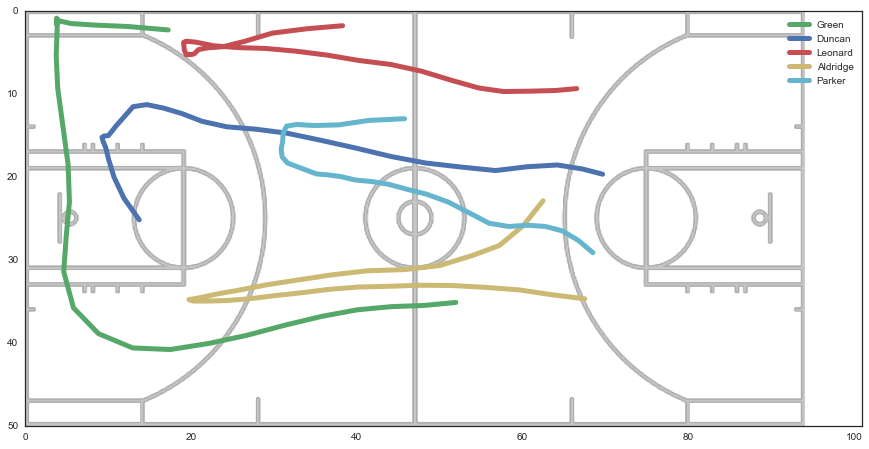

Model wins
Model Choice: Danny Green
User Choice: Tim Duncan
Actual Shooter: Danny Green
Model Score: 2
User Score: 0


In [70]:
newGame.PlayGame()